In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os


In [2]:
os.getcwd()

'/content'

In [3]:
df=pd.read_csv('retail_sales_dataset.csv')

In [4]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [5]:
df.shape

(1000, 9)

In [6]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [8]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [9]:
df['Age'].mean()

41.392

In [10]:
df['Quantity'].median()

3.0

In [11]:
df['Price per Unit'].std()

189.68135627129232

In [12]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [13]:
df['Quantity'].sum()

2514

In [14]:
df.dtypes

Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object

In [15]:
df['Date']=pd.to_datetime(df['Date'],infer_datetime_format=True)

<ipython-input-15-857a31a23a5d>:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date']=pd.to_datetime(df['Date'],infer_datetime_format=True)


<Axes: >

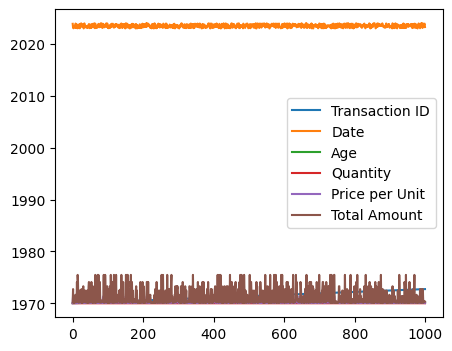

In [16]:
df.plot(figsize=(5,4))

In [17]:
product_cat_fr=df['Product Category'].value_counts()
product_cat_fr

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64

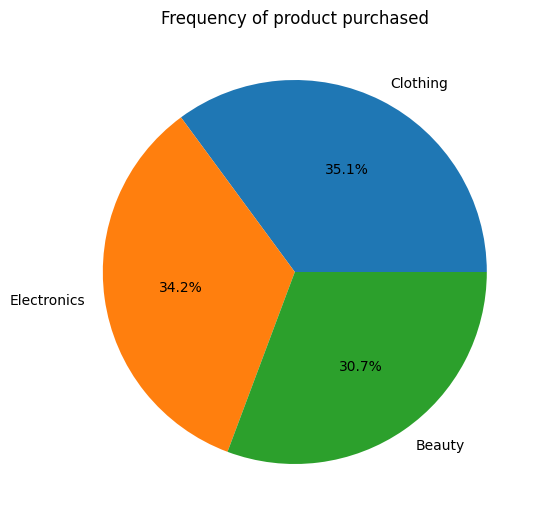

In [18]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
l=['Clothing','Electronics','Beauty']
s=[351,342,307]
plt.title("Frequency of product purchased")
plt.pie(s,labels=l,autopct='%0.1f%%')
plt.show()

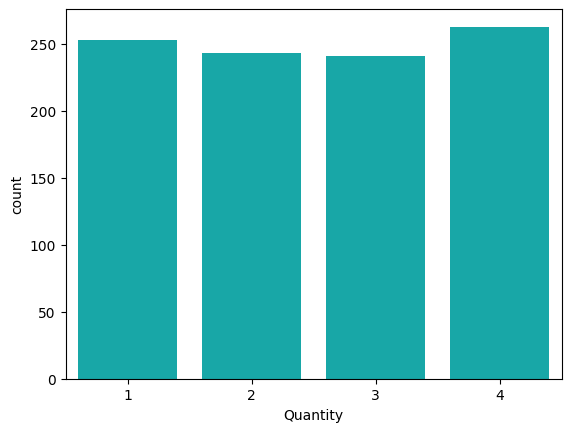

In [19]:
ax=sns.countplot(x='Quantity',data=df,color='c')

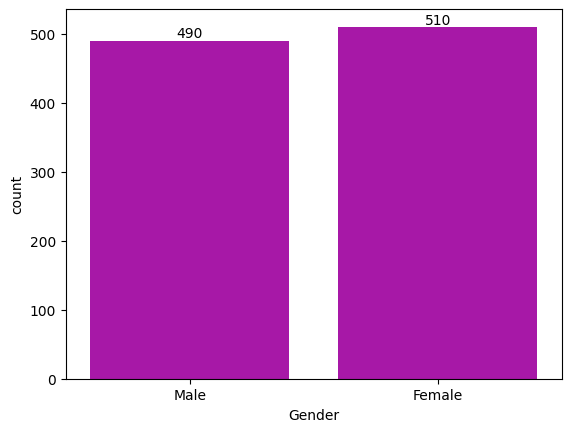

In [20]:
ax=sns.countplot(x='Gender',data=df,color='m')
for bar in ax.containers:
  ax.bar_label(bar)

In [21]:
dy=df.groupby(['Product Category'],as_index=False)['Quantity'].sum().sort_values(by='Product Category',ascending=True)
dy

,Product Category,Quantity
0,Beauty,771
1,Clothing,894
2,Electronics,849


**Time Series Analysis**

In [22]:
#assuming the dataset has a 'Data' column, convert it to datetime format
df['Date']=pd.to_datetime(df['Date'])

#Extracting year,quarter and month from the 'Date' column
df['Year']=df['Date'].dt.year
df['Quarter']=df['Date'].dt.quarter
df['Month']=df['Date'].dt.month

In [23]:
#Group by year ,quarter and month ,and calculate the total amount of transcations
total_amount_by_year=df.groupby('Year')['Total Amount'].sum()
total_amount_by_quarter=df.groupby(['Year','Quarter'])['Total Amount'].sum()
total_amount_by_month=df.groupby(['Year','Month'])['Total Amount'].sum()

In [24]:
#Print the total amount of transcations changed over a years,quarters and months
print("\nTotal Amount of transcation changed over Years:")
print(total_amount_by_year)

print("\nTotal Amount of transcation changed over Quarter:")
print(total_amount_by_quarter)

print("\nTotal Amount of transcation changed over Month:")
print(total_amount_by_month)


Total Amount of transcation changed over Years:
Year
2023    454470
2024      1530
Name: Total Amount, dtype: int64

Total Amount of transcation changed over Quarter:
Year  Quarter
2023  1          108500
      2          123735
      3           96045
      4          126190
2024  1            1530
Name: Total Amount, dtype: int64

Total Amount of transcation changed over Month:
Year  Month
2023  1        35450
      2        44060
      3        28990
      4        33870
      5        53150
      6        36715
      7        35465
      8        36960
      9        23620
      10       46580
      11       34920
      12       44690
2024  1         1530
Name: Total Amount, dtype: int64


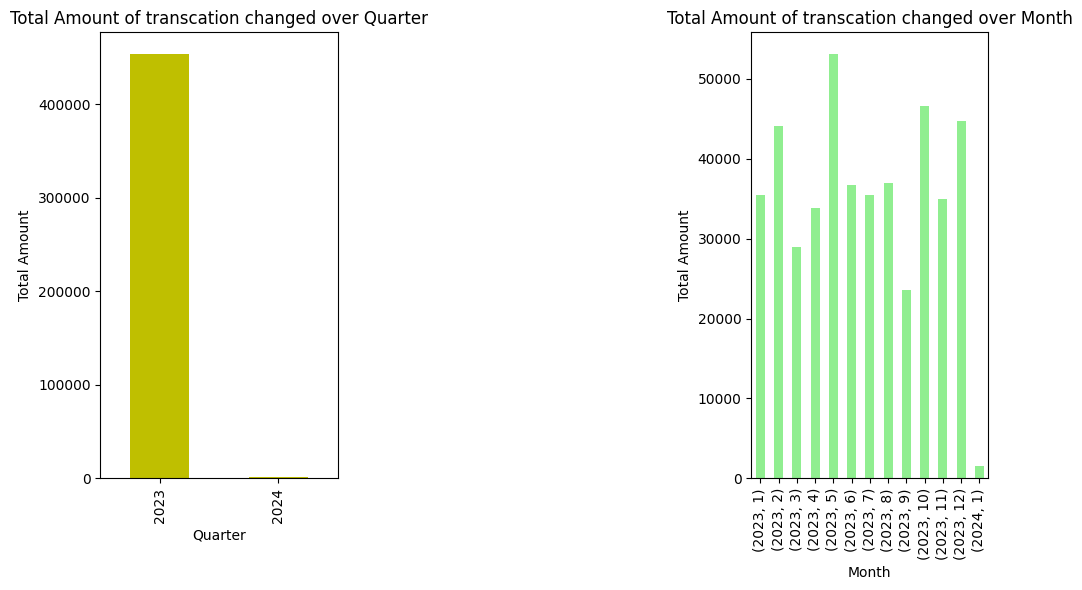

In [25]:
#Plot bar graphs for total amount of transcations changed over years
plt.figure(figsize=(10,6))

#Bar graph for total amount of transcations changed over years
plt.subplot(1,3,1)
total_amount_by_year.plot(kind='bar',color='y')
plt.title('Total Amount of transcation changed over Quarter')
plt.xlabel('Quarter')
plt.ylabel('Total Amount')

#Bar graph for total amount  of transcation changed over month
plt.subplot(1,3,3)
total_amount_by_month.plot(kind='bar',color='lightgreen')
plt.title('Total Amount of transcation changed over Month')
plt.xlabel('Month')
plt.ylabel('Total Amount')

plt.tight_layout()
plt.show()



In [26]:
df.index

RangeIndex(start=0, stop=1000, step=1)

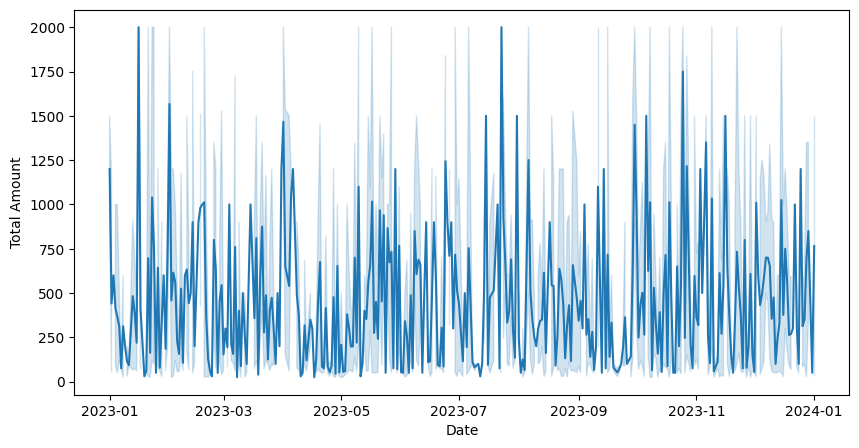

In [27]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Date',y='Total Amount',data=df)
plt.show()

In [28]:
price_stats=df['Price per Unit'].describe()
print("\nDescriptive Statistics of Price per unit:")
print(price_stats)


Descriptive Statistics of Price per unit:
count    1000.000000
mean      179.890000
std       189.681356
min        25.000000
25%        30.000000
50%        50.000000
75%       300.000000
max       500.000000
Name: Price per Unit, dtype: float64


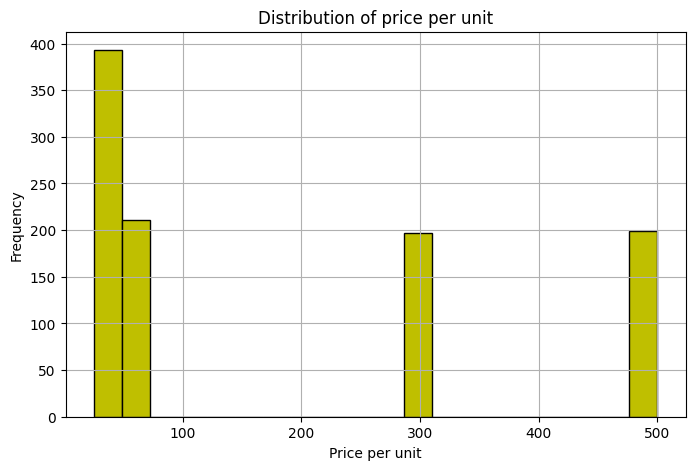

In [29]:
plt.figure(figsize=(8,5))
plt.hist(df['Price per Unit'],bins=20,color='y',edgecolor='black')
plt.title('Distribution of price per unit')
plt.xlabel('Price per unit')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [30]:
df['Total Amount']=df['Quantity']*df['Price per Unit']
total_amount=df['Total Amount'].sum()
print("\nTotal Revenue Generated: $",total_amount)



Total Revenue Generated: $ 456000


In [31]:
#calcule the average price per unit over time
avg_price_over_time=df.groupby('Date')['Price per Unit'].mean()

#Print the average Price per unit over time
print("\nAverage Price per Unit over time:")
print(avg_price_over_time)


Average Price per Unit over time:
Date
2023-01-01    366.666667
2023-01-02    151.250000
2023-01-03    300.000000
2023-01-04    193.333333
2023-01-05    191.666667
                 ...    
2023-12-27    175.000000
2023-12-28    183.333333
2023-12-29    281.250000
2023-12-31     25.000000
2024-01-01    265.000000
Name: Price per Unit, Length: 345, dtype: float64
